##Emotion Classification using CNN

Download and extract dataset

In [ ]:
!kaggle datasets download -d tapakah68/facial-emotion-recognition
!unzip facial-emotion-recognition.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open facial-emotion-recognition.zip, facial-emotion-recognition.zip.zip or facial-emotion-recognition.zip.ZIP.


Define constants

In [ ]:
DATA_DIR = 'images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

Load images + labels,Split dataset,Normalize and Reshape Images

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)
images, labels = load_data()
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Build,compile and train the CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(EMOTIONS), activation='softmax')
])
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=40,
                    validation_data=(X_test, y_test))


Epoch 1/20
2/2 [==============================] - 2s 656ms/step - loss: 2.0913 - accuracy: 0.1373 - val_loss: 2.0622 - val_accuracy: 0.0769
Epoch 2/20
2/2 [==============================] - 1s 314ms/step - loss: 2.0269 - accuracy: 0.1373 - val_loss: 2.0659 - val_accuracy: 0.0769
Epoch 3/20
2/2 [==============================] - 1s 307ms/step - loss: 1.9665 - accuracy: 0.1569 - val_loss: 1.9958 - val_accuracy: 0.4615
Epoch 4/20
2/2 [==============================] - 1s 353ms/step - loss: 1.8547 - accuracy: 0.5294 - val_loss: 1.8651 - val_accuracy: 0.3846
Epoch 5/20
2/2 [==============================] - 1s 215ms/step - loss: 1.7185 - accuracy: 0.4314 - val_loss: 1.6354 - val_accuracy: 0.4615
Epoch 6/20
2/2 [==============================] - 0s 188ms/step - loss: 1.5121 - accuracy: 0.5294 - val_loss: 1.3104 - val_accuracy: 0.5385
Epoch 7/20
2/2 [==============================] - 0s 210ms/step - loss: 1.1841 - accuracy: 0.7255 - val_loss: 0.9717 - val_accuracy: 0.8462
Epoch 8/20
2/2 [====

Evaluate the model

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 44ms/step - loss: 0.0381 - accuracy: 1.0000


[0.03805502876639366, 1.0]

Vizualize Results

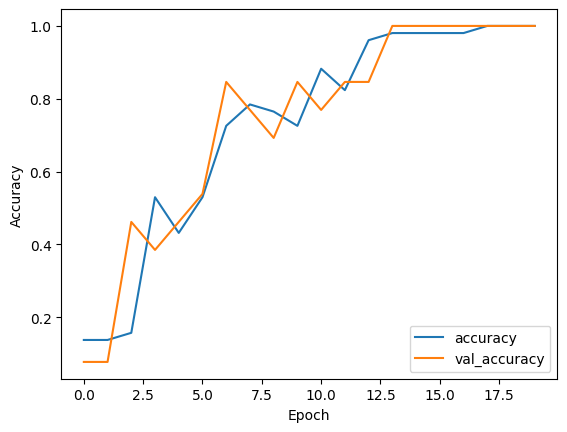

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Download and Preprocess a real image

In [ ]:
def load_and_prep_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_normalized = img_resized / 255.0
    img_reshaped = img_normalized.reshape( IMG_SIZE, IMG_SIZE, 1)
    return img_reshaped

In [ ]:
!wget https://airbnboverlast.nl/wp-content/uploads/2016/06/happy-man.jpg

--2024-06-19 07:17:41--  https://airbnboverlast.nl/wp-content/uploads/2016/06/happy-man.jpg
Resolving airbnboverlast.nl (airbnboverlast.nl)... 195.201.31.243, 2a01:4f8:1c0c:5819::1
Connecting to airbnboverlast.nl (airbnboverlast.nl)|195.201.31.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85454 (83K) [image/jpeg]
Saving to: ‘happy-man.jpg’

happy-man.jpg       100%[===================>]  83.45K   274KB/s    in 0.3s    

2024-06-19 07:17:42 (274 KB/s) - ‘happy-man.jpg’ saved [85454/85454]



Run prediction

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_normalized = img_resized / 255.0
    img_reshaped = img_normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    return img_reshaped
input_img_path = '/content/man.jpg'

input_img = preprocess_image(input_img_path)

predictions = model.predict(input_img)

predicted_label = EMOTIONS[np.argmax(predictions)]
print("Predicted emotion:",predicted_label)

1/1 [==============================] - 0s 23ms/step
Predicted emotion: [[2.8776512e-08 2.9125875e-02 9.6727586e-01 6.1400002e-05 3.5289598e-03
  2.9545954e-06 4.0901774e-08 4.9181422e-06]]
